In [8]:
# !pip install numpy pandas matplotlib
%matplotlib inline

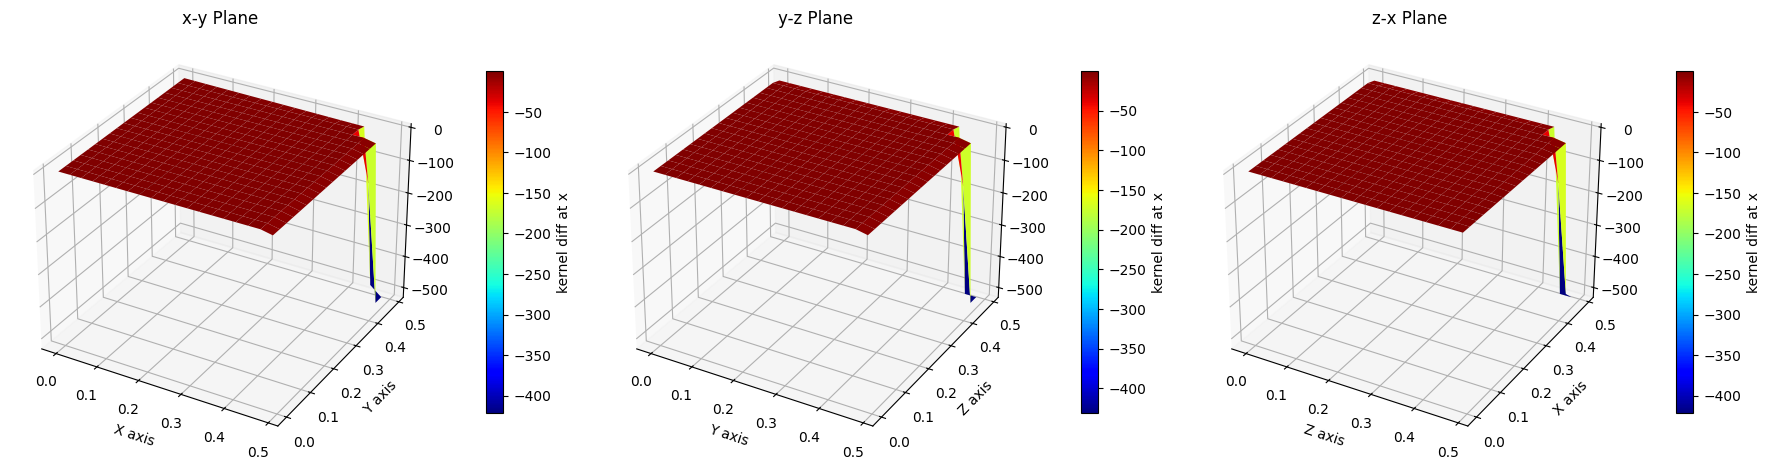

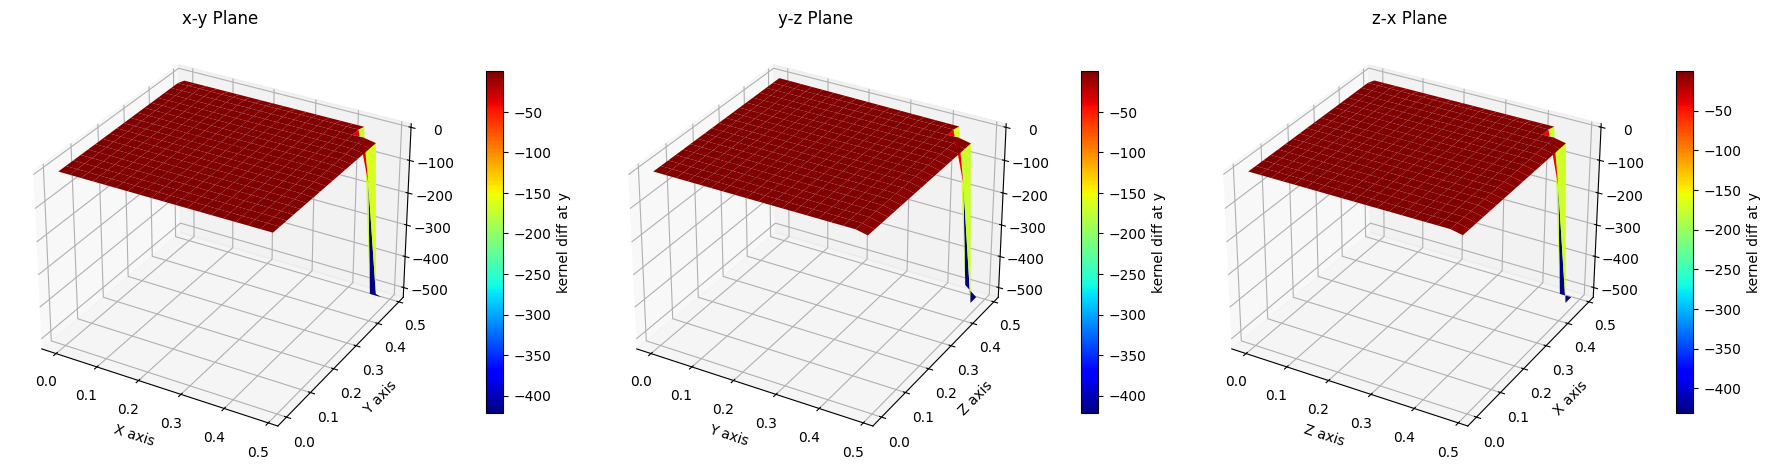

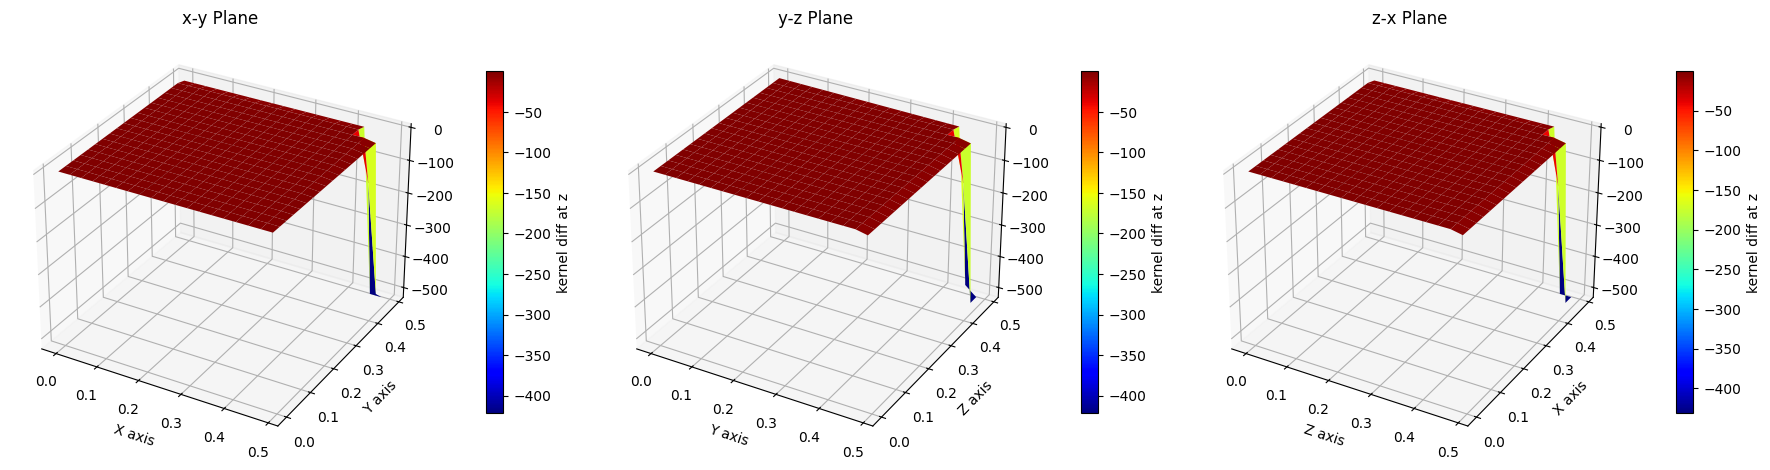

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_surface(ax, x, y, values, xlabel, ylabel, zlabel, title):
    """
    Plot surface on the given axis ax.
    """
    # --- Fix 1: Ensure numpy arrays ---
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    values = np.asarray(values).flatten()

    # --- Fix 2: Create meshgrid with unique values ---
    x_unique = np.unique(x)
    y_unique = np.unique(y)
    X, Y = np.meshgrid(x_unique, y_unique)

    # --- Fix 3: Initialize Z with NaN to handle missing points ---
    Z = np.full_like(X, np.nan, dtype=float)

    # --- Fix 4: Map values to grid safely ---
    for i in range(len(x)):
        xi = np.where(x_unique == x[i])[0][0]
        yi = np.where(y_unique == y[i])[0][0]
        Z[yi, xi] = values[i]

    # --- Plot surface ---
    surf = ax.plot_surface(X, Y, Z, cmap="jet", edgecolor="none")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # --- Colorbar ---
    cbar = plt.colorbar(surf, ax=ax, pad=0.1, shrink=0.6)
    cbar.set_label(zlabel)


def main(data, axis=1):
    x = data["x"]
    y = data["y"]
    z = data["z"]

    # kernel diff-x, y, z
    dwdq = data["dwdq1"]
    label = "kernel diff at x"
    if axis == 2:
        dwdq = data["dwdq2"]
        label = "kernel diff at y"
    elif axis == 3:
        dwdq = data["dwdq2"]
        label = "kernel diff at z"

    values = dwdq  # Choose what to visualize

    # --- Fix 5: Single figure with 3 subplots ---
    fig = plt.figure(figsize=(18, 6))

    # x-y plane
    ax1 = fig.add_subplot(1, 3, 1, projection="3d")
    plot_surface(ax1, x, y, values, "X axis", "Y axis", label, "x-y Plane")

    # y-z plane
    ax2 = fig.add_subplot(1, 3, 2, projection="3d")
    plot_surface(ax2, y, z, values, "Y axis", "Z axis", label, "y-z Plane")

    # z-x plane
    ax3 = fig.add_subplot(1, 3, 3, projection="3d")
    plot_surface(ax3, z, x, values, "Z axis", "X axis", label, "z-x Plane")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # --- Load data ---
    file_path = "kernel.csv"
    data = pd.read_csv(file_path)
    main(data, axis=1)
    main(data, axis=2)
    main(data, axis=3)